In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df_vendas = pd.DataFrame({'frutas':['Alface','Cebola','Amora','Maça','Cereja','Melão','Melão','MELÃO','Melancia'],
                  'vendas':[2000,1500,3000,2200,1800,1750,2000,2430,3000]})

frutas = {'manga','goiaba','amora','maça','cereja','melao','melancia'} 

In [2]:
df_vendas

,frutas,vendas
0,Alface,2000
1,Cebola,1500
2,Amora,3000
3,Maça,2200
4,Cereja,1800
5,Melão,1750
6,Melão,2000
7,MELÃO,2430
8,Melancia,3000


# Separando dados incorretos com base em outros corretos - set( ) - difference( )
<p> É muito comum que queiramos separar nossos datasets, para que nossas analises façam sentido. </p>
<p> Nesse exemplo para explicar as maneiras de separar e manipular nossos dados, faremos uma simulação de um dataset de vendas. </p> 
<p><b>No exemplo queremos ter em nossa base tipos de frutas para assim analisar sua venda, mas podemos ver que Cebola e Alface não são um tipo de fruta, solicitamos então ao gestor uma lista com todas frutas que são vendidas dentro do mercadinho, e com essa lista podemos efetuar essa filtragem.</b></p>

<p>Nossos itens unicos da nossa coluna <b>frutas</b>:</p>

In [3]:
set(df_vendas['frutas']) 

{'Alface', 'Amora', 'Cebola', 'Cereja', 'MELÃO', 'Maça', 'Melancia', 'Melão'}

<p>Todas frutas que podem ser vendidas na loja: </p>

In [4]:
frutas

{'amora', 'cereja', 'goiaba', 'manga', 'maça', 'melancia', 'melao'}

<p> Percebemos que além da cebola e alface que estão na categoria frutas, existem frutas que ainda não foram vendidas, mas deixa-las na lista é importante, pois futuramente elas poderão ser vendidas, e ter impacto na filtragem. </p>

## Verificando formatação dos dados de uma coluna - contains ( )

<p>Dados podem ser salvos de diversas formas, porém... Para uma analise precisa é necessário que eles tenham um determinado padrão, assim como dados divididos em letras maiúsuclas e minúsculas, os dados que apresentam caracteres a mais ou a menos devem ser modificados, para que todos se tornem um mesmo padrão.</p>

<p> Com <b>contains</b> podemos ver que temos dados com ~ dos quais devem ser padronizados, para que si encaixem com as frutas </p>

In [5]:
df_vendas[df_vendas['frutas'].str.contains("ã|Ã")]

,frutas,vendas
5,Melão,1750
6,Melão,2000
7,MELÃO,2430


<p> Podemos substitui-las com o replace </p>

In [6]:
df_vendas['frutas'] = df_vendas['frutas'].str.replace("ã|Ã","a")
df_vendas

,frutas,vendas
0,Alface,2000
1,Cebola,1500
2,Amora,3000
3,Maça,2200
4,Cereja,1800
5,Melao,1750
6,Melao,2000
7,MELaO,2430
8,Melancia,3000


<p>Podemos também padronizar os dados com letras minúsculas </p>

In [7]:
df_vendas['frutas'] = df_vendas['frutas'].str.lower()
df_vendas

,frutas,vendas
0,alface,2000
1,cebola,1500
2,amora,3000
3,maça,2200
4,cereja,1800
5,melao,1750
6,melao,2000
7,melao,2430
8,melancia,3000


<p> Agora que os dados estão padronizados podemos efetuar sua seleção </p>

<b>DICA: podemos usar o .str.contains(" palavra 1 | palavra 2 ").any() para verificar palavras no DF</b>

## Efetuando filtragem


<p><b><i>1- Passo</i></b>: Transformamos os dados a serem analisados em <b>SET</b>, para que assim eles apresentem seus valores de maneira unica. </p>
<p><b><i>2- Passo</i></b>: Usamos o método <b>.difference( )</b> de <b>SET</b> com a nossa lista de frutas possiveis. </p>

```python
SET(df['coluna analisada']).difference(df['coluna dados corretos'])
```

In [8]:
set(df_vendas['frutas']).difference(frutas) 

{'alface', 'cebola'}

<p><b><i>3- Passo</i></b>: Com isso receberemos como resposta, os dados que estão diferentes do dataset analisado aos dados que são possíveis e corretos.</p>
<p><b><i>4- Passo</i></b>:
	Podemos então utilizar o <b>isin( )</b> para localizar as linhas em que os dados errados se encontram e utilizar o <i>~</i> para selecionar as linhas em que os dados errados não se encontram. </p>

In [9]:
df_frutas = df_vendas[~df_vendas['frutas'].isin(set(df_vendas['frutas']).difference(frutas))]
df_frutas

,frutas,vendas
2,amora,3000
3,maça,2200
4,cereja,1800
5,melao,1750
6,melao,2000
7,melao,2430
8,melancia,3000


<p> Temos assim nosso dataset limpo, sem itens que não sejam frutas. </p>

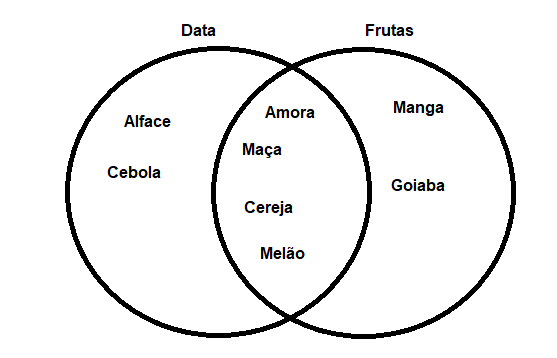

# Separando para categoriza-los. - cut( ) - qcut( )
<p> Quando temos dados numericos podemos transforma-los em categorias, para que assim seja mais fácil sua visualização. </p>
<p> Podemos separar as quantidades de vendas em ranges de valores <b>cut.</b> </p>
<p> Podemos separar as quantidades de vendas por quantis <b>qcut.</b></p>
<p> Podemos separar as quantidades de vendas de produtos que venderam acima de 2000 e abaixo de 2000 <b>booleano.</b> </p>

In [10]:
df_frutas

,frutas,vendas
2,amora,3000
3,maça,2200
4,cereja,1800
5,melao,1750
6,melao,2000
7,melao,2430
8,melancia,3000


<p> Separamos os dados em 3 ranges diferentes com <b>CUT</b> </p>

In [11]:
df_frutas['cut_vendas'] = pd.cut(df_frutas['vendas'],bins = 3,labels = ['A','B','C'])
df_frutas

,frutas,vendas,cut_vendas
2,amora,3000,C
3,maça,2200,B
4,cereja,1800,A
5,melao,1750,A
6,melao,2000,A
7,melao,2430,B
8,melancia,3000,C


<p> Separamos os dados em 3 quantis diferentes com <b>QCUT</b> </p>

In [12]:
df_frutas['qcut_vendas'] = pd.qcut(df_frutas['vendas'],q = 3,labels = ['A','B','C'])
df_frutas

,frutas,vendas,cut_vendas,qcut_vendas
2,amora,3000,C,C
3,maça,2200,B,B
4,cereja,1800,A,A
5,melao,1750,A,A
6,melao,2000,A,A
7,melao,2430,B,B
8,melancia,3000,C,C


<p> Separamos os dados com mais de 2000 vendas e menos de 2000 vendas com <b>loc</b> </p>

In [13]:
df_frutas.loc[df_frutas['vendas']>=2000,'booleano_vendas'] = '>2000'
df_frutas.loc[df_frutas['vendas']<2000,'booleano_vendas'] = '<2000'
df_frutas

,frutas,vendas,cut_vendas,qcut_vendas,booleano_vendas
2,amora,3000,C,C,>2000
3,maça,2200,B,B,>2000
4,cereja,1800,A,A,<2000
5,melao,1750,A,A,<2000
6,melao,2000,A,A,>2000
7,melao,2430,B,B,>2000
8,melancia,3000,C,C,>2000


<p> Maneiras de aplicar a separação. </p>

Syntax
```python
# usando qcut e separando com base em quantis
df['col nova'] = pd.qcut(df['col'],q = quantidades de quantis , labels = ['nomes_das_separações'])

# usando cut e separando com base em bins
df['col nova'] = pd.cut(df['col'], bins = valores_de_separação, labels = ['nomes_das_separações'])

# Outra opção
df.loc[ df['col'] > parametro, df['col nova'] = nome_da_categoria
```

# Categorizar numericamente nossas categorias
<p> Muitas vezes para alguns objetivos, queremos que nossas variáveis tenham valor numerico, para isso podemos utilizar o map ou replace para remapealas ou o label encoder para encoda-las. </p>

Replacing ou Mapping

In [14]:
mapa = {'>2000':1,'<2000':0}
df_frutas['vendas_mapeadas'] = df_frutas['booleano_vendas'].replace(mapa) # podemos usar o map ao invés do replace
df_frutas

,frutas,vendas,cut_vendas,qcut_vendas,booleano_vendas,vendas_mapeadas
2,amora,3000,C,C,>2000,1
3,maça,2200,B,B,>2000,1
4,cereja,1800,A,A,<2000,0
5,melao,1750,A,A,<2000,0
6,melao,2000,A,A,>2000,1
7,melao,2430,B,B,>2000,1
8,melancia,3000,C,C,>2000,1


<p> Também podemos encodar as variaveis com LabelEncoder </p>

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoding = le.fit_transform(df_frutas['booleano_vendas'])
df_frutas['encoding'] = encoding
df_frutas

,frutas,vendas,cut_vendas,qcut_vendas,booleano_vendas,vendas_mapeadas,encoding
2,amora,3000,C,C,>2000,1,1
3,maça,2200,B,B,>2000,1,1
4,cereja,1800,A,A,<2000,0,0
5,melao,1750,A,A,<2000,0,0
6,melao,2000,A,A,>2000,1,1
7,melao,2430,B,B,>2000,1,1
8,melancia,3000,C,C,>2000,1,1


<p> RESULTADOS </p>

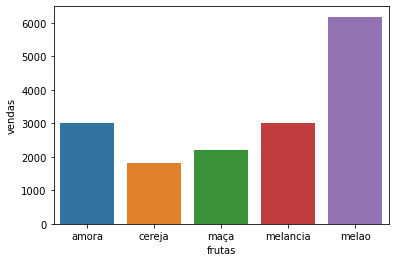

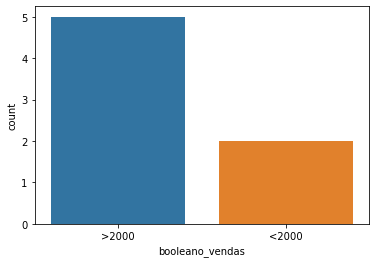

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
df_grouped = df_frutas.groupby('frutas',as_index=False).sum()
df_grouped_b = df_frutas.groupby('booleano_vendas',as_index=False).sum()
sns.barplot(x='frutas',y='vendas',data=df_grouped)
plt.show()
sns.countplot(x='booleano_vendas',data=df_frutas)
plt.show()

<p><b>Dica: podemos usar o np.nan quando queremos atribuir o valor nan a alguma replace</b></p>
</div>